In [1]:
import os
# úprava proměnné prostředí pro tento proces
os.environ['KERAS_BACKEND'] = 'torch'  # Keras použije pro výpočty PyTorch

import keras
from keras.layers import Dense
import numpy as np
from sklearn.preprocessing import StandardScaler

from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
datasets = np.load('lab10_dataset.npz')
print(datasets.keys())

KeysView(NpzFile 'lab10_dataset.npz' with keys: data_0, data_1, data_2)


In [3]:
# selected_dataset = 'data_0'
# selected_dataset = 'data_1'
selected_dataset = 'data_0'
data = datasets[selected_dataset]

In [4]:
# [diskuse, tabule] rozsahy vstupů a výstupů neuronové sítě

In [5]:
####### TODO: preprocessing (? využít scikit-learn ?)
# Separate inputs and outputs
if data.shape[0] == 2:
    # 1D problem: data_0 or data_1
    X = data[0, :].reshape(-1, 1)  # Shape: (n_samples, 1)
    y = data[1, :].reshape(-1, 1)  # Shape: (n_samples, 1)
elif data.shape[0] == 3:
    # 2D problem: data_2
    X = data[0:2, :].T  # Shape: (n_samples, 2)
    y = data[2, :].reshape(-1, 1)  # Shape: (n_samples, 1)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

# Normalize inputs and outputs
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

print(f'\nOriginal X range: [{X.min():.2f}, {X.max():.2f}]')
print(f'Scaled X range: [{X_scaled.min():.2f}, {X_scaled.max():.2f}]')
print(f'Original y range: [{y.min():.2f}, {y.max():.2f}]')
print(f'Scaled y range: [{y_scaled.min():.2f}, {y_scaled.max():.2f}]')

X shape: (24, 1)
y shape: (24, 1)

Original X range: [-5.91, 9.98]
Scaled X range: [-1.66, 1.67]
Original y range: [-118.72, 67.22]
Scaled y range: [-1.80, 2.04]


In [6]:
####### TODO: vyzkoušejte varianty definice modelu pomocí
 #  keras.models.Sequential
 #  keras.models.Model - functional API

from keras.layers import Input

input_dim = X_scaled.shape[1]
output_dim = 1

model = keras.models.Sequential([
    Input(shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(output_dim, activation='linear')
])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 609 (2.38 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# příprava k učení - compile metoda
model.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics=['mae']
)

In [9]:
# trénování/učení - fit metoda
history = model.fit(
    X_scaled, 
    y_scaled,
    epochs=1000,
    batch_size=8,
    verbose=0,
    validation_split=0.1
)

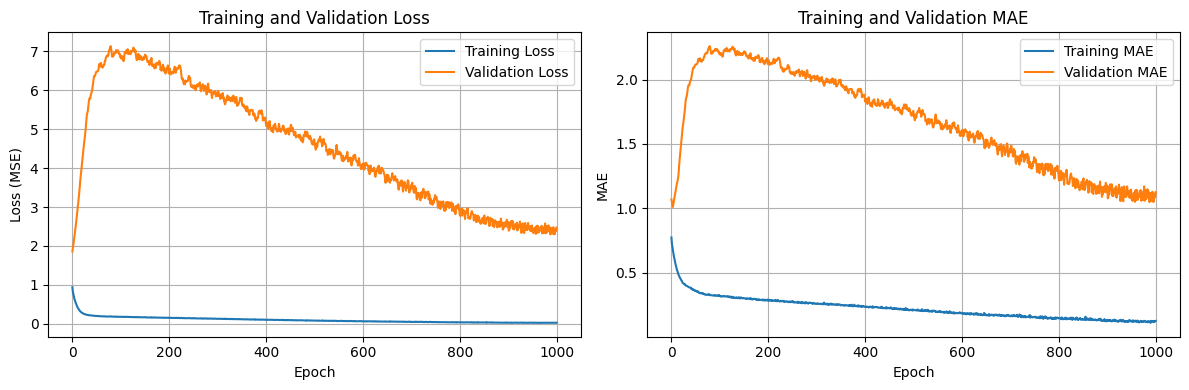


Final Training Loss: 0.025639
Final Validation Loss: 2.472352
Final Training MAE: 0.126322
Final Validation MAE: 1.126305


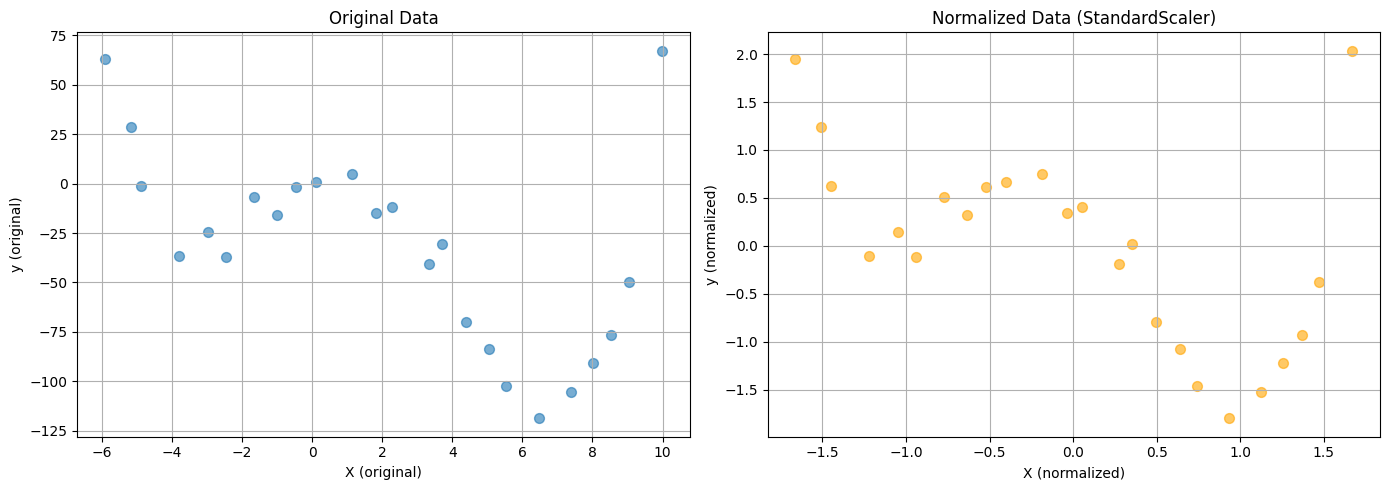

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\nFinal Training Loss: {history.history['loss'][-1]:.6f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.6f}")
print(f"Final Training MAE: {history.history['mae'][-1]:.6f}")
print(f"Final Validation MAE: {history.history['val_mae'][-1]:.6f}")

# Visualize original vs normalized data
plt.figure(figsize=(14, 5))

# Original data
plt.subplot(1, 2, 1)
if X.shape[1] == 1:
    plt.scatter(X, y, alpha=0.6, s=50)
    plt.xlabel('X (original)')
    plt.ylabel('y (original)')
    plt.title('Original Data')
    plt.grid(True)
elif X.shape[1] == 2:
    ax = plt.subplot(1, 2, 1, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y, alpha=0.6, s=50)
    ax.set_xlabel('X1 (original)')
    ax.set_ylabel('X2 (original)')
    ax.set_zlabel('y (original)')
    ax.set_title('Original Data')

# Normalized data
plt.subplot(1, 2, 2)
if X_scaled.shape[1] == 1:
    plt.scatter(X_scaled, y_scaled, alpha=0.6, s=50, color='orange')
    plt.xlabel('X (normalized)')
    plt.ylabel('y (normalized)')
    plt.title('Normalized Data (StandardScaler)')
    plt.grid(True)
elif X_scaled.shape[1] == 2:
    ax = plt.subplot(1, 2, 2, projection='3d')
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], y_scaled, alpha=0.6, s=50, color='orange')
    ax.set_xlabel('X1 (normalized)')
    ax.set_ylabel('X2 (normalized)')
    ax.set_zlabel('y (normalized)')
    ax.set_title('Normalized Data')

plt.tight_layout()
plt.show()

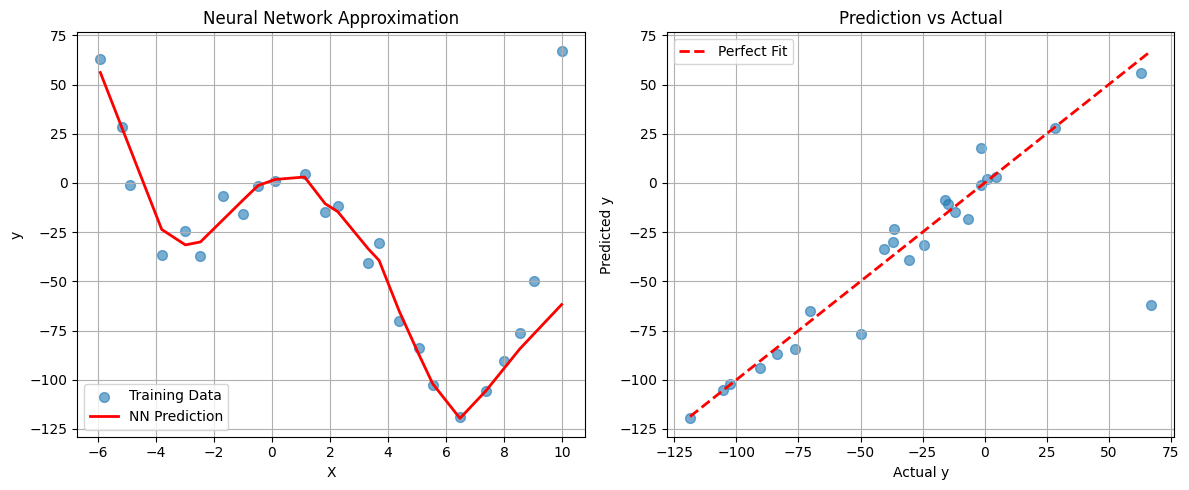

Mean Squared Error: 771.0734
Mean Absolute Error : 11.4677
R² Score: 0.6718


In [11]:
# vyhodnocení
# Make predictions on training data
y_pred_scaled = model.predict(X_scaled, verbose=0)

# Transform back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Plot results
plt.figure(figsize=(12, 5))

if X.shape[1] == 1:
    # Sort for nice line plot
    sort_idx = np.argsort(X.flatten())
    
    plt.subplot(1, 2, 1)
    plt.scatter(X, y, alpha=0.6, s=50, label='Training Data')
    plt.plot(X[sort_idx], y_pred[sort_idx], 'r-', linewidth=2, label='NN Prediction')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Neural Network Approximation')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.scatter(y, y_pred, alpha=0.6, s=50)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Perfect Fit')
    plt.xlabel('Actual y')
    plt.ylabel('Predicted y')
    plt.title('Prediction vs Actual')
    plt.legend()
    plt.grid(True)
    
elif X.shape[1] == 2:
    ax = plt.subplot(1, 2, 1, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y, alpha=0.6, s=50, label='Training Data')
    ax.scatter(X[:, 0], X[:, 1], y_pred, alpha=0.6, s=50, marker='^', label='NN Prediction')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    ax.set_title('3D Neural Network Approximation')
    ax.legend()
    
    plt.subplot(1, 2, 2)
    plt.scatter(y, y_pred, alpha=0.6, s=50)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Perfect Fit')
    plt.xlabel('Actual y')
    plt.ylabel('Predicted y')
    plt.title('Prediction vs Actual')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error : {mae:.4f}")
print(f"R² Score: {r2:.4f}")

In [12]:
# uložení modelu do souboru pro další použití
dtstr = datetime.now().strftime("%Y%m%d-%H%M%S")
filename = f'model_{dtstr}.keras'
model.save(filename)
print(f'model uložen do souboru "{filename}"')

model uložen do souboru "model_20251120-084324.keras"


In [13]:
test_points = np.array([[-5], [0], [5], [10]])
predictions = model.predict(scaler_X.transform(test_points), verbose=0)
predictions_original = scaler_y.inverse_transform(predictions)

for x, y_pred in zip(test_points.flatten(), predictions_original.flatten()):
    print(f"x = {x:6.1f}  →  predicted y = {y_pred:8.2f}")

y_pred_all = scaler_y.inverse_transform(model.predict(X_scaled, verbose=0))
for i in range(min(5, len(X))): 
    print(f"x={X[i][0]:6.3f}: actual={y[i][0]:8.3f}, predicted={y_pred_all[i][0]:8.3f}, error={abs(y[i][0]-y_pred_all[i][0]):6.3f}")

x =   -5.0  →  predicted y =    21.91
x =    0.0  →  predicted y =     1.14
x =    5.0  →  predicted y =   -85.07
x =   10.0  →  predicted y =   -61.48
x=-5.906: actual=  63.130, predicted=  56.144, error= 6.986
x=-5.163: actual=  28.519, predicted=  28.065, error= 0.454
x=-4.894: actual=  -1.257, predicted=  17.897, error=19.153
x=-3.793: actual= -36.652, predicted= -23.613, error=13.039
x=-2.977: actual= -24.307, predicted= -31.481, error= 7.173
